In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import ROOT_DIR
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
def pi_bytes(log_path):

    log_path = os.path.join(log_path, 'pi_logs')
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    ticks = None
    time_arr = None
    labels = []
    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            mb_sent = (df['bytes_sent'] - df['bytes_sent'][0]) * 1e-6
            axes[0].plot(mb_sent)
            labels.append(f'Pi{log[5:-4]}')
            if ticks is None:
                time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
                time = int(time.total_seconds() / 60)
                ticks = np.arange(0, len(df), int(len(df)/5))
                time_arr = np.arange(0, time, time / len(ticks), dtype=int)

    axes[0].set_xticks(ticks)
    axes[0].set_xticklabels(time_arr)
    axes[0].set_ylabel('Sent data in Mbyte')

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            mb_sent = (df['bytes_recv'] - df['bytes_recv'][0]) * 1e-6
            axes[1].plot(mb_sent)

    axes[1].set_xticks(ticks)
    axes[1].set_xticklabels(time_arr)
    axes[1].set_ylabel('Received data in Mbyte')

    fig.text(0.5, 0, 'Time in minutes', ha='center', va='center')

    lgd = fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)
    plt.tight_layout()
    plt.savefig('figures/performance_bytes.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [3]:
def pi_cpu(log_path):
    log_path = os.path.join(log_path, 'pi_logs')
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    ticks = None
    time_arr = None
    labels = []

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_user = (df['cpu0_user'] + df['cpu1_user'] + df['cpu2_user'] + df['cpu3_user']) / 4
            axes[0].plot(cpu_user)
            labels.append(f'Pi{log[5:-4]}')
            if ticks is None:
                time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
                time = int(time.total_seconds() / 60)
                ticks = np.arange(0, len(df), int(len(df) / 5))
                time_arr = np.arange(0, time, time / len(ticks), dtype=int)

    axes[0].set_xticks(ticks)
    axes[0].set_xticklabels(time_arr)
    axes[0].set_ylabel('CPU usage in %')

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_freq = (df['cpu0_freq'] + df['cpu1_freq'] + df['cpu2_freq'] + df['cpu3_freq']) / 4 / 1000
            axes[1].plot(cpu_freq)

    axes[1].set_xticks(ticks)
    axes[1].set_xticklabels(time_arr)
    axes[1].set_ylabel('CPU frequency in GHz')

    fig.text(0.5, 0, 'Time in minutes', ha='center', va='center')

    lgd = fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)
    plt.tight_layout()
    plt.savefig('figures/performance_cpu.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [4]:
def pi_box_usage(log_path):
    log_path = os.path.join(log_path, 'pi_logs')

    usage_dict = {}
    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_user = (df['cpu0_user'] + df['cpu1_user'] + df['cpu2_user'] + df['cpu3_user']) / 4
            usage_dict[f'Pi{log[5:-4]}'] = cpu_user

    fig, ax = plt.subplots()
    ax.boxplot(usage_dict.values())
    ax.set_xticklabels(usage_dict.keys(), rotation = 45)
    ax.set_ylabel('Average usage in %')
    plt.tight_layout()
    plt.savefig('figures/performance_cpu_box_usage.svg')
    plt.show()


In [5]:
def pi_box_freq(log_path):
    log_path = os.path.join(log_path, 'pi_logs')

    freq_dict = {}
    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_freq = (df['cpu0_freq'] + df['cpu1_freq'] + df['cpu2_freq'] + df['cpu3_freq']) / 4 / 1000
            freq_dict[f'Pi{log[5:-4]}'] = cpu_freq

    fig, ax = plt.subplots()
    ax.boxplot(freq_dict.values())
    ax.set_xticklabels(freq_dict.keys(), rotation = 45)
    ax.set_ylabel('Average frequency in GHz')
    plt.tight_layout()
    plt.savefig('figures/performance_cpu_box_freq.svg')
    plt.show()

In [6]:
def pi_ram(log_path):
    log_path = os.path.join(log_path, 'pi_logs')
    fig, axes = plt.subplots(1, 1, figsize=(10, 4))
    ticks = None
    time_arr = None
    labels = []

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            ram_usage = df['memory_used'] * 1e-6
            axes.plot(ram_usage)
            labels.append(f'Pi{log[5:-4]}')
            if ticks is None:
                time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
                time = int(time.total_seconds() / 60)
                ticks = np.arange(0, len(df), int(len(df) / 5))
                time_arr = np.arange(0, time, time / len(ticks), dtype=int)

    axes.set_xticks(ticks)
    axes.set_xticklabels(time_arr)
    axes.set_ylabel('Ram usage in MBytes')

    fig.text(0.5, 0, 'Time in minutes', ha='center', va='center')

    lgd = fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)
    plt.tight_layout()
    plt.savefig('figures/performance_ram.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [7]:
def pi_power(log_path):
    log_path = os.path.join(log_path, 'pi_logs')
    df = pd.read_csv(os.path.join(log_path, 'raspi_power.csv'))
    time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
    df = df.mean(axis=0)
    power = []
    pis = []
    for i, column in enumerate(df.index):
        if 'power' in column:
            power.append(df[column] / 1000)
            pis.append(f'Pi{column[5:-6]}')

    df = pd.DataFrame({
        'Watts per hour (Wh)': power,
        ' ': pis
    })
    sns.set(rc={'figure.figsize':(10,5)})
    ax = sns.barplot(x=' ', y='Watts per hour (Wh)', data=df, palette="Blues_d")

    for index, row in df.iterrows():
        ax.text(row.name, round(row.values[0], 2), round(row.values[0], 2), color='black', ha="center")

    print(f'Watts: {sum(power)} Training: {time}')
    plt.tight_layout()
    plt.savefig('figures/performance_power_consumption.svg')
    plt.show()

In [8]:
def pi_bytes_bar():
    steps = [1, 4, 10]
    aggs = [400, 100, 40]
    df_res = pd.DataFrame()
    sent_list = []
    recv_list = []
    time_list = []
    model_list = ['CNN', 'LSTM', 'ResNet', 'DenseNet']

    for k in range(len(steps)+4):

        if k == 0:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_iid",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_iid",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_iid",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_iid"
            ]
        elif k == 1:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_noniid",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_noniid",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_noniid",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_noniid"
            ]
        elif k == 2:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_noniid_no_stopping",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_noniid_no_stopping",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_noniid_no_stopping",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_noniid_no_stopping"
            ]
        elif k == 3:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_noniid_no_stopping_cosine",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_noniid_no_stopping_cosine",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_noniid_no_stopping_cosine",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_noniid_no_stopping_cosine"
            ]
        else:
            i = k - 4
            models = [
                f"Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine",
                f"Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine",
                f"Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine",
                f"Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine"
            ]

        for j, run in enumerate(models):
            log_path = os.path.join('../models/librosa', run, 'pi_logs')
            mb_sent_total = 0
            mb_recv_total = 0
            for i, log in enumerate(os.listdir(log_path)):
                if 'power' not in log:
                    df = pd.read_csv(os.path.join(log_path, log))
                    mb_sent_total += (df['bytes_sent'].iloc[-1] - df['bytes_sent'].iloc[0]) * 1e-9
                    mb_recv_total += (df['bytes_recv'].iloc[-1] - df['bytes_recv'].iloc[0]) * 1e-9
                    if '24' in log:
                        time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))

            recv_list.append(mb_recv_total)
            time_list.append(time.total_seconds() / 3600)
            sent_list.append(mb_sent_total)

    df_res['Received'] = recv_list
    df_res['Sent in GB'] = sent_list
    df_res['Model'] = model_list * (len(steps) + 4)
    df_res['Method'] = ['IID'] * 4 \
                       +['Non-IID'] * 4 \
                       + ['Non-IID + No Stopping'] * 4 \
                       + ['Non-IID + No Stopping + Cosine'] * 4 \
                       + ['Non-IID + No Stopping + Cosine + Step 1'] * 4 \
                       + ['Non-IID + No Stopping + Cosine + Step 4'] * 4 \
                       + ['Non-IID + No Stopping + Cosine + Step 10'] * 4
    df_res['Time in Hours'] = time_list
    df_res['Sent in GB'] = df_res['Sent in GB'].round(2)
    df_res['Time in Hours'] = df_res['Time in Hours'].round(2)


    fig, axes = plt.subplots(2, 1)
    sns.set(rc={'figure.figsize':(15,10)})
    ax = sns.barplot(ax=axes[0], x='Model', y='Sent in GB', hue='Method', data=df_res)
    ax.legend([],[], frameon=False)
    for container in ax.containers:
        ax.bar_label(container)

    ax = sns.barplot(ax=axes[1], x='Model', y='Time in Hours', hue='Method', data=df_res)
    ax.legend([],[], frameon=False)
    for container in ax.containers:
        ax.bar_label(container)

    plt.legend(bbox_to_anchor=(0.15, -0.2), loc=2, borderaxespad=0., ncol=3)
    #axes[0].set_title('Results of the Docker environment')
    #axes[1].set_title('Results of the Pi environment')

    plt.tight_layout()
    plt.savefig('figures/step_epoch_sent_comparison.svg')
    plt.show()

In [21]:
def pi_bytes_bar_normalized():
    steps = [1, 4, 10]
    aggs = [400, 100, 40]
    df_res = pd.DataFrame()
    sent_list = []
    norm_list = []
    model_list = ['CNN', 'LSTM', 'ResNet', 'DenseNet']
    model_size = [1.408, .241, .236, .157]
    for k in range(len(steps)+4):

        if k == 0:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_iid",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_iid",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_iid",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_iid"
            ]
        elif k == 1:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_noniid",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_noniid",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_noniid",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_noniid"
            ]
        elif k == 2:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_noniid_no_stopping",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_noniid_no_stopping",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_noniid_no_stopping",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_noniid_no_stopping"
            ]
        elif k == 3:
            models=[
                "Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-100_epoch-1_noniid_no_stopping_cosine",
                "Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_noniid_no_stopping_cosine",
                "Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-100_epoch-1_noniid_no_stopping_cosine",
                "Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-100_epoch-1_noniid_no_stopping_cosine"
            ]
        else:
            i = k - 4
            models = [
                f"Federated_16_CNN1D_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS]_Syn/lr-0.055_wd-0.0_nl-4_ss-19_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine",
                f"Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine",
                f"Federated_16_RESNET_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_COT]_Syn/lr-0.052_wd-0.001_nl-4_ss-20_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine",
                f"Federated_16_DENSE_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_MFCC_DCS_AOT]_Syn/lr-0.075_wd-0.001_nl-3_ss-12_agg-{aggs[i]}_step-{steps[i]}_noniid_no_stopping_cosine"
            ]

        for j, run in enumerate(models):
            log_path = os.path.join('../models/librosa', run, 'pi_logs')
            mb_sent_total = 0
            mb_recv_total = 0
            for i, log in enumerate(os.listdir(log_path)):
                if 'power' not in log:
                    df = pd.read_csv(os.path.join(log_path, log))
                    mb_sent_total += (df['bytes_sent'].iloc[-1] - df['bytes_sent'].iloc[0]) * 1e-9
                    if '24' in log:
                        time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))

            train_time = (time.total_seconds() / 3600)
            sent_list.append(mb_sent_total / model_size[j])
            norm_list.append(mb_sent_total / train_time)

    df_res['Sent data normalized with model size'] = sent_list
    df_res['Model'] = model_list * (len(steps) + 4)
    df_res['Method'] = ['IID'] * 4 \
                       +['Non-IID'] * 4 \
                       + ['Non-IID + No Stopping'] * 4 \
                       + ['Non-IID + No Stopping + Cosine'] * 4 \
                       + ['Non-IID + No Stopping + Cosine + Step 1'] * 4 \
                       + ['Non-IID + No Stopping + Cosine + Step 4'] * 4 \
                       + ['Non-IID + No Stopping + Cosine + Step 10'] * 4
    df_res['Sent data normalized with train time'] = norm_list
    df_res['Sent data normalized with model size'] = df_res['Sent data normalized with model size'].round(2)
    df_res['Sent data normalized with train time'] = df_res['Sent data normalized with train time'].round(2)


    fig, axes = plt.subplots(2, 1)
    sns.set(rc={'figure.figsize':(15,10)})
    ax = sns.barplot(ax=axes[0], x='Model', y='Sent data normalized with model size', hue='Method', data=df_res)
    ax.legend([],[], frameon=False)
    for container in ax.containers:
        ax.bar_label(container)

    ax = sns.barplot(ax=axes[1], x='Model', y='Sent data normalized with train time', hue='Method', data=df_res)
    ax.legend([],[], frameon=False)
    for container in ax.containers:
        ax.bar_label(container)

    plt.legend(bbox_to_anchor=(0.15, -0.2), loc=2, borderaxespad=0., ncol=3)
    #axes[0].set_title('Results of the Docker environment')
    #axes[1].set_title('Results of the Pi environment')

    plt.tight_layout()
    plt.savefig('figures/step_epoch_sent_comparison_norm', dpi=300)
    plt.show()

In [10]:
def compute_time(log_path):
    log_path = os.path.join(log_path, 'pi_logs')
    fig, axes = plt.subplots(1, 1, figsize=(10, 4))
    ticks = None
    time_arr = None
    labels = []

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log and ('17' in log or '46' in log):
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_user = (df['cpu0_user'] + df['cpu1_user'] + df['cpu2_user'] + df['cpu3_user']) / 4
            usage = np.zeros(len(cpu_user))
            usage[cpu_user > 20] = 1
            usage = usage[120:1120]
            axes.plot(usage)
            labels.append(f'Pi{log[5:-4]}')
            if ticks is None:
                time = (datetime.fromisoformat(df['time'].iloc[1120]) - datetime.fromisoformat(df['time'].iloc[120]))
                time = int(time.total_seconds() / 60)
                ticks = np.arange(0, len(usage), int(len(usage) / 5))
                time_arr = np.arange(0, time, time / len(ticks), dtype=int)

    axes.set_xticks(ticks)
    axes.set_xticklabels(time_arr)
    axes.set_ylabel('CPU over 20%')

    fig.text(0.5, 0, 'Time in minutes', ha='center', va='center')

    lgd = fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)
    plt.tight_layout()
    plt.savefig('figures/compute_time_cpu.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [11]:
log_dir = os.path.join(ROOT_DIR, "models/librosa/Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-100_epoch-1_noniid_no_stopping_cosine")
#log_dir = os.path.join(ROOT_DIR, "models/librosa/Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_agg-40_step-10_noniid_no_stopping_cosine")
#pi_bytes(log_dir)

In [12]:
#pi_cpu(log_dir)

In [13]:
#pi_box_usage(log_dir)

In [14]:
#pi_box_freq(log_dir)

In [15]:
#pi_ram(log_dir)

In [16]:
#pi_power(log_dir)

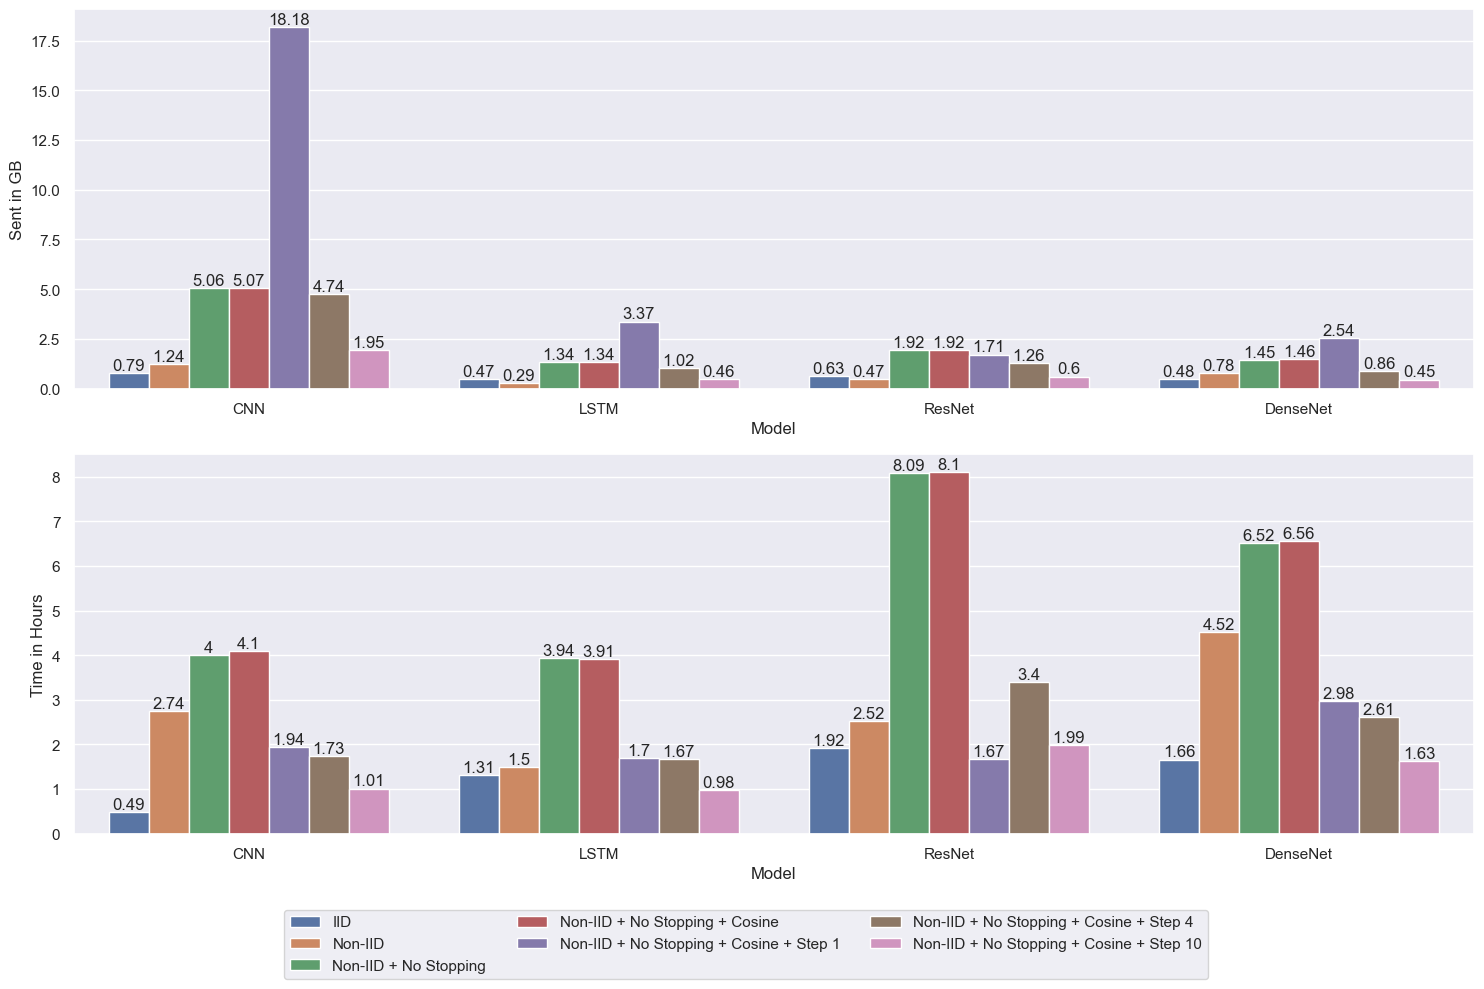

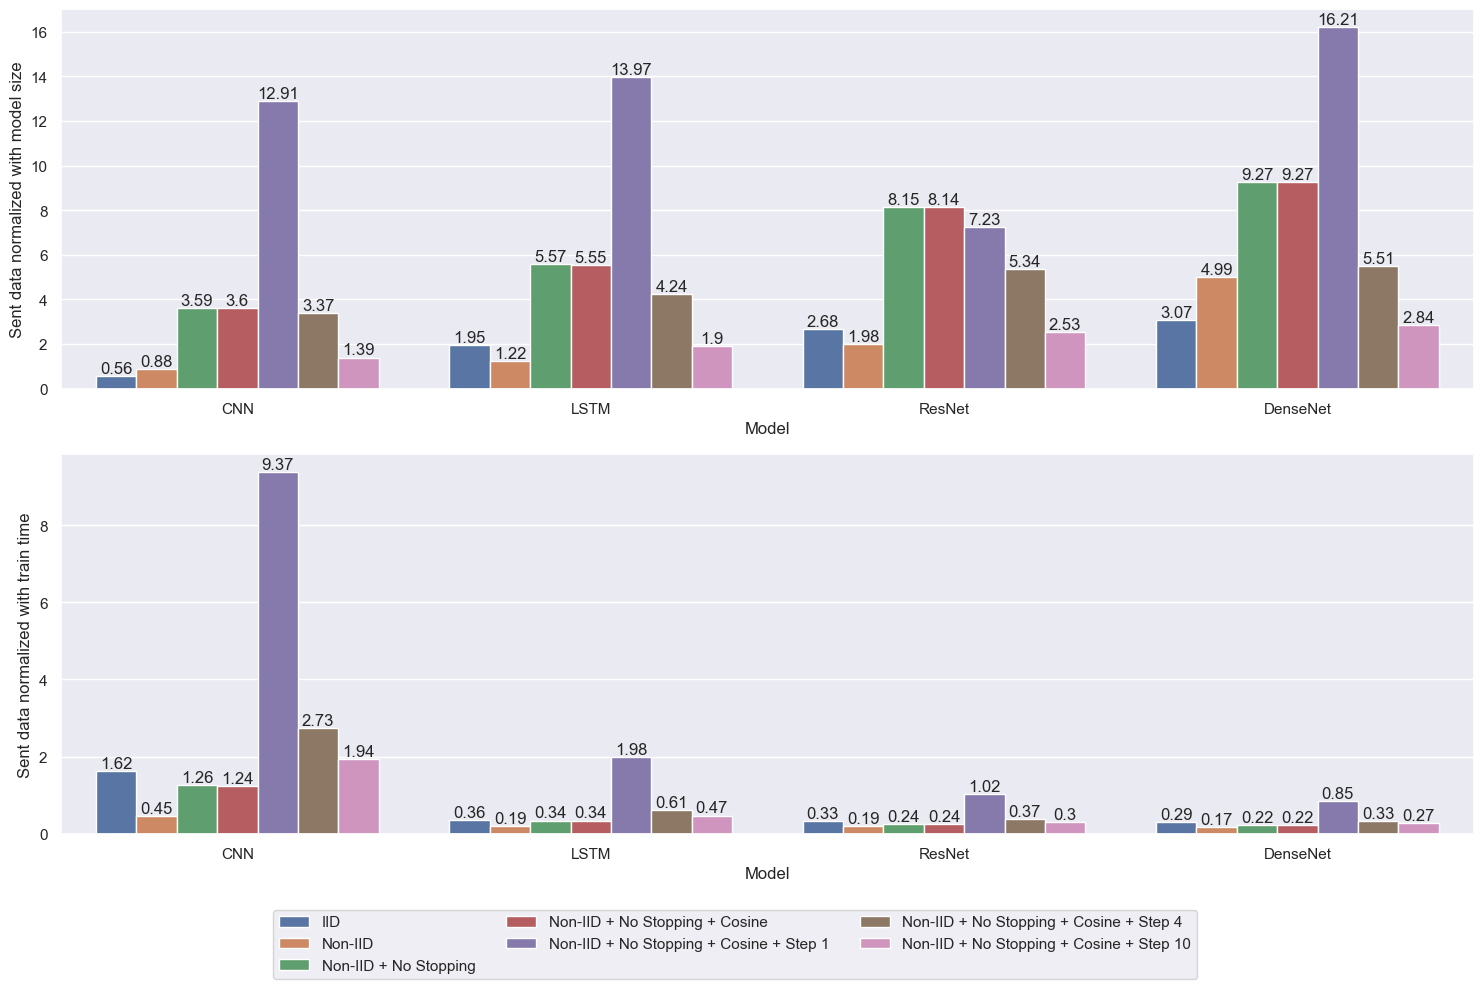

In [22]:
pi_bytes_bar()
pi_bytes_bar_normalized()

In [18]:
#compute_time(log_dir)